In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

df = pd.read_csv("../output/df_modele_musees.csv")
df.head()

,id_patrimostat,id_museofile,dateappellation,ferme,anneefermeture,ville,codeInseeCommune,annee,payant,gratuit,...,annee_creation,latitude,longitude,total_frequentation,age_musee,age_musee_missing,total_t_1,croissance_total,has_excel,est_idf
0,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2014,1865.0,2685.0,...,1960.0,48.410166,7.451102,4550.0,54.0,0,NaN,NaN,1,0
1,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2015,1874.0,1934.0,...,1960.0,48.410166,7.451102,3808.0,55.0,0,4550.0,-0.163077,1,0
2,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2016,1705.0,1409.0,...,1960.0,48.410166,7.451102,3114.0,56.0,0,3808.0,-0.182248,1,0
3,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2017,1163.0,1281.0,...,1960.0,48.410166,7.451102,2444.0,57.0,0,3114.0,-0.215157,1,0
4,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2018,1249.0,2341.0,...,1960.0,48.410166,7.451102,3590.0,58.0,0,2444.0,0.468903,1,0


In [3]:
#Aperçus du dataframe
df.info()

#attention : une ligne = un musée pr une année

#Stats desc sur le total de frequentation
df["total"].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_patrimostat               11250 non-null  object 
 1   id_museofile                 11230 non-null  object 
 2   dateappellation              11230 non-null  object 
 3   ferme                        11223 non-null  object 
 4   anneefermeture               1015 non-null   object 
 5   ville                        11250 non-null  object 
 6   codeInseeCommune             11250 non-null  object 
 7   annee                        11250 non-null  int64  
 8   payant                       11249 non-null  float64
 9   gratuit                      11249 non-null  float64
 10  total                        11248 non-null  float64
 11  individuel                   9855 non-null   float64
 12  scolaires                    9913 non-null   float64
 13  groupes_hors_sco

count    1.124800e+04
mean     5.018695e+04
std      3.477633e+05
min      0.000000e+00
25%      2.029500e+03
50%      8.481000e+03
75%      2.650125e+04
max      1.010596e+07
Name: total, dtype: float64

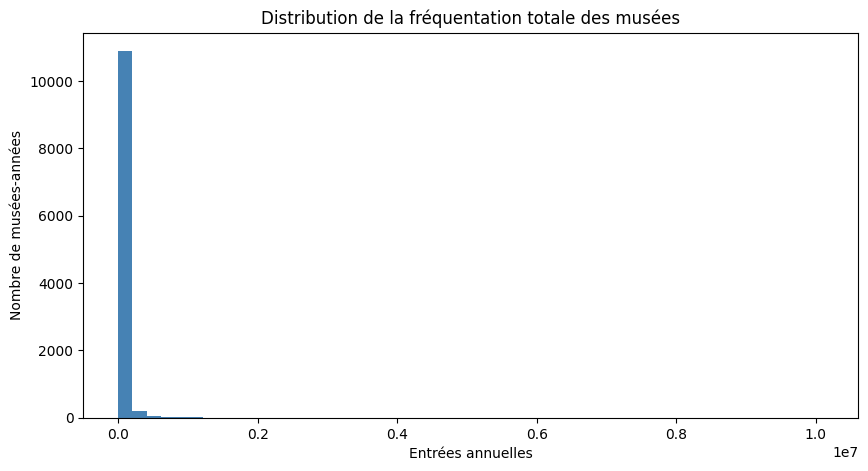

In [4]:
#histogramme pr voir distrib
plt.figure(figsize=(10,5))
plt.hist(df["total"], bins=50, color="steelblue")
plt.title("Distribution de la fréquentation totale des musées")
plt.xlabel("Entrées annuelles")
plt.ylabel("Nombre de musées-années")
plt.show()





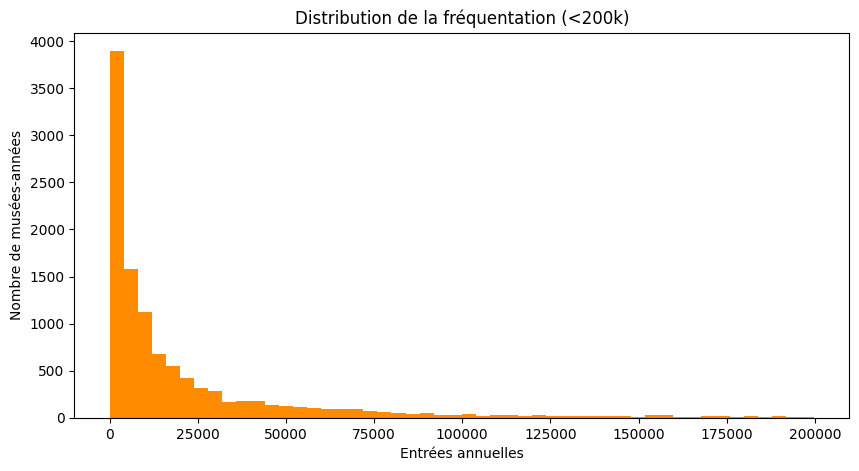

In [5]:
#on remarque les valeurs aberrantes dues aux gros musées
df_sub = df[df["total"] < 200000]

plt.figure(figsize=(10,5))
plt.hist(df_sub["total"], bins=50, color="darkorange")
plt.title("Distribution de la fréquentation (<200k)")
plt.xlabel("Entrées annuelles")
plt.ylabel("Nombre de musées-années")
plt.show()

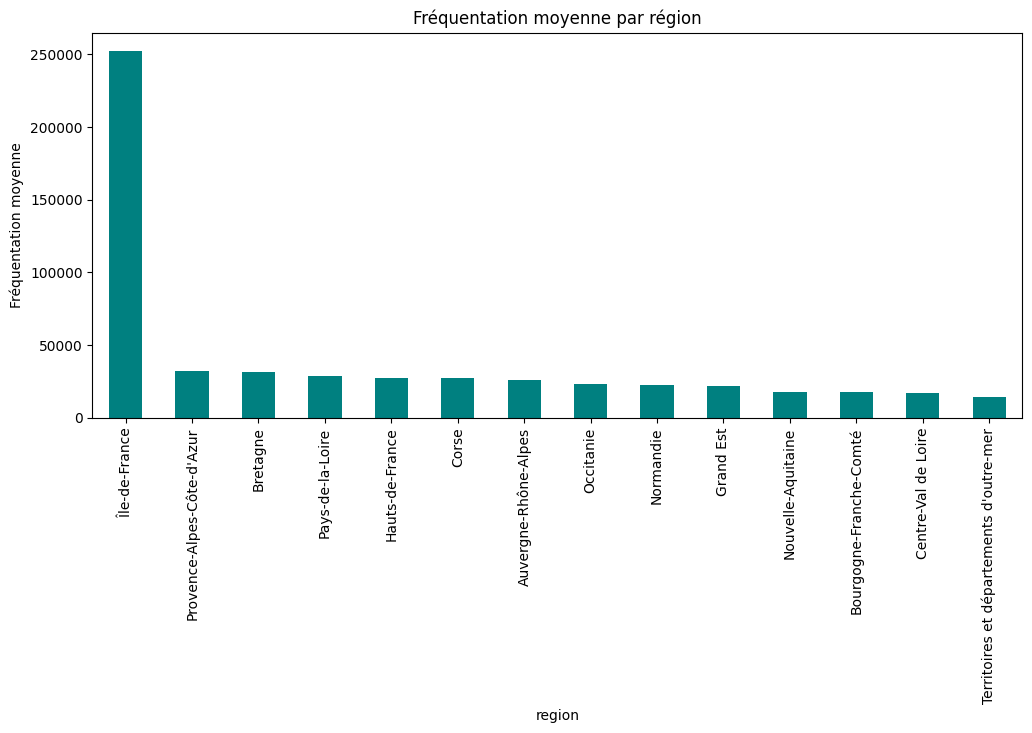

In [6]:
#freq par region
df_reg = (
    df.groupby("region")["total"]
      .mean()
      .sort_values(ascending=False)
)

df_reg.plot(kind="bar", figsize=(12,5), color="teal")
plt.title("Fréquentation moyenne par région")
plt.ylabel("Fréquentation moyenne")
plt.show()


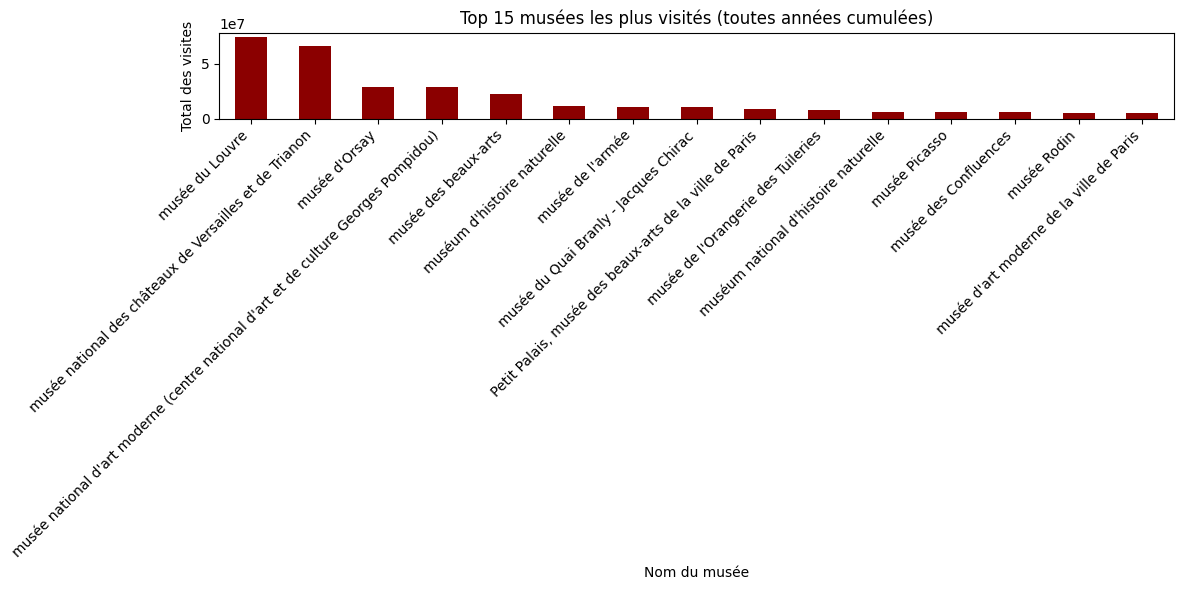

In [7]:
#top15 des musées les plus freq
top_musees = (
    df.groupby("nom_officiel")["total"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(12,6))
top_musees.plot(kind="bar", color="darkred")
plt.title("Top 15 musées les plus visités (toutes années cumulées)")
plt.ylabel("Total des visites")
plt.xlabel("Nom du musée")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [8]:
#DF GEO 
# On enlève les lignes sans coordonnées
df_geo = df.dropna(subset=["latitude", "longitude"]).copy()

# Création de la colonne geometry à partir de lon/lat
gdf_points = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo["longitude"], df_geo["latitude"]),
    crs="EPSG:4326"  # WGS84, le classique lat/lon
)

gdf_points.head()


,id_patrimostat,id_museofile,dateappellation,ferme,anneefermeture,ville,codeInseeCommune,annee,payant,gratuit,...,latitude,longitude,total_frequentation,age_musee,age_musee_missing,total_t_1,croissance_total,has_excel,est_idf,geometry
0,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2014,1865.0,2685.0,...,48.410166,7.451102,4550.0,54.0,0,NaN,NaN,1,0,POINT (7.4511 48.41017)
1,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2015,1874.0,1934.0,...,48.410166,7.451102,3808.0,55.0,0,4550.0,-0.163077,1,0,POINT (7.4511 48.41017)
2,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2016,1705.0,1409.0,...,48.410166,7.451102,3114.0,56.0,0,3808.0,-0.182248,1,0,POINT (7.4511 48.41017)
3,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2017,1163.0,1281.0,...,48.410166,7.451102,2444.0,57.0,0,3114.0,-0.215157,1,0,POINT (7.4511 48.41017)
4,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2018,1249.0,2341.0,...,48.410166,7.451102,3590.0,58.0,0,2444.0,0.468903,1,0,POINT (7.4511 48.41017)


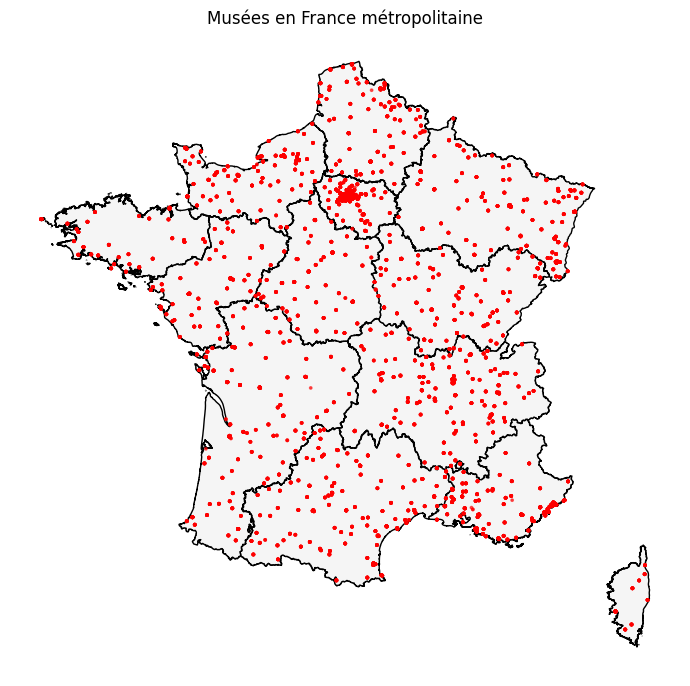

In [9]:
from cartiflette import carti_download
#carte des musées en FR métro
#Filtre France métropolitaine sur les points
mask_metropole = (
    gdf_points.geometry.y.between(41, 52) &   # latitude
    gdf_points.geometry.x.between(-6, 10)     # longitude
)
gdf_points_metropole = gdf_points[mask_metropole].copy()

#Télécharger la carte des régions
france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# garder seulement la métropole
france = france.loc[france["INSEE_REG"] > 10]

#Tracer
fig, ax = plt.subplots(figsize=(7, 9))

# fond de carte
france.plot(ax=ax, color="whitesmoke", edgecolor="black")

# taille des points bornée (évite la grosse tache)
ms = np.clip(gdf_points_metropole["total"] / 100000, 3, 20)

gdf_points_metropole.plot(
    ax=ax,
    markersize=ms,
    color="red",
    alpha=0.6
)

ax.set_title("Musées en France métropolitaine")
ax.set_axis_off()
plt.tight_layout()
plt.show()


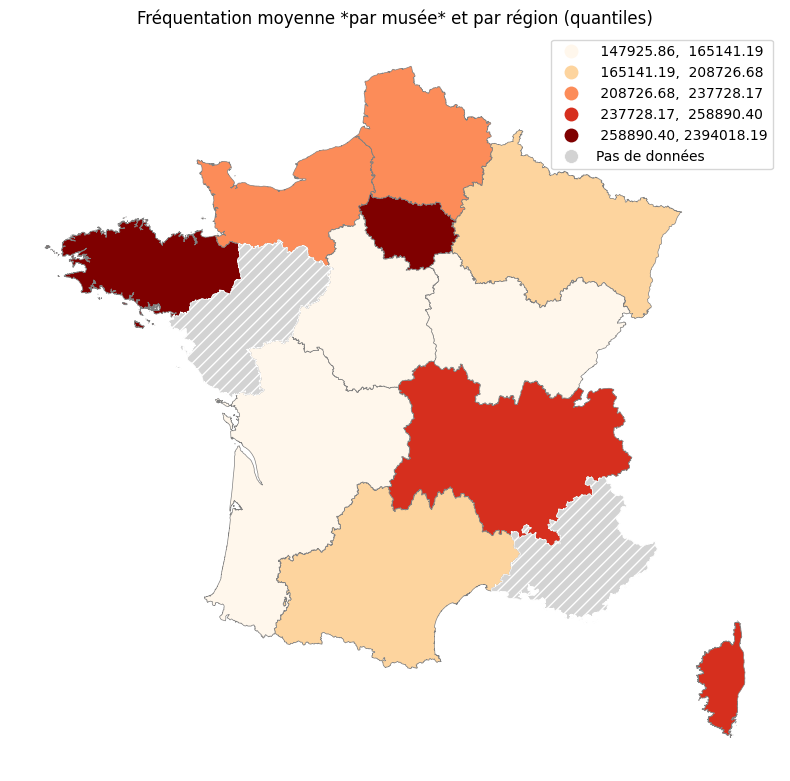

In [ ]:
#carte des frequentations
# Fréquentation moyenne par musée dans chaque région
df_region = (
    df.groupby("region")
      .agg(
          visites_totales=("total", "sum"),
          nb_musees=("id_museofile", "nunique")
      )
)

df_region["freq_par_musee"] = df_region["visites_totales"] / df_region["nb_musees"]
df_region = df_region.reset_index()


# Jointure
df_region["region_clean"] = df_region["region"].str.strip().str.lower()
france["region_clean"] = france["LIBELLE_REGION"].str.strip().str.lower()

france_reg = france.merge(
    df_region[["region_clean", "freq_par_musee"]],
    on="region_clean",
    how="left"
)



fig, ax = plt.subplots(figsize=(8, 9))

france_reg.plot(
    column="freq_par_musee",
    ax=ax,
    cmap="OrRd",
    legend=True,
    scheme="Quantiles",  # découpe en classes de même effectif
    k=5,                 # 5 classes 
    edgecolor="grey",
    linewidth=0.5,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "Pas de données"
    }
)

ax.set_title("Fréquentation moyenne par musée et par région (quantiles)")
ax.set_axis_off()
plt.tight_layout()
plt.show()

#régler pb des missing values

